<h1><b>Brain Tumor Data Analysis</b></h1>

<h3><b>Import Data</b</h3>

---

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, f_oneway
import scipy.stats as stats

In [2]:
df = pd.read_csv("/Users/lazizasamov/Desktop/Kaggle/Brain_T/brain_tumor_dataset.csv")

<h2><b>Data processing</b></h2>

---

In [3]:
# View first 10 rows of the data
df.head(10)

,Tumor Type,Location,Size (cm),Grade,Patient Age,Gender
0,Oligodendroglioma,Occipital Lobe,9.23,I,48,Female
1,Ependymoma,Occipital Lobe,0.87,II,47,Male
2,Meningioma,Occipital Lobe,2.33,II,12,Female
3,Ependymoma,Occipital Lobe,1.45,III,38,Female
4,Ependymoma,Brainstem,6.45,I,35,Female
5,Astrocytoma,Brainstem,2.82,III,46,Male
6,Meningioma,Temporal Lobe,1.29,I,71,Female
7,Meningioma,Frontal Lobe,7.83,II,16,Female
8,Meningioma,Occipital Lobe,0.72,II,38,Male
9,Ependymoma,Temporal Lobe,2.07,II,77,Male


In [4]:
# Check data types and general information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tumor Type   1000 non-null   object 
 1   Location     1000 non-null   object 
 2   Size (cm)    1000 non-null   float64
 3   Grade        1000 non-null   object 
 4   Patient Age  1000 non-null   int64  
 5   Gender       1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [5]:
# Check any missing values
df.isnull().sum()

Tumor Type     0
Location       0
Size (cm)      0
Grade          0
Patient Age    0
Gender         0
dtype: int64

In [6]:
# Define categorical columns. Grade is defined here as type category just to check counts.
df['Tumor Type'] = df['Tumor Type'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Grade'] = df['Grade'].astype('category')
df['Gender'] = df['Gender'].astype('category')


<h1><b> Exploratory Data Analysis</b></h1>

---

<h3><b>Categorical data distribution</b></h3>

<h4><b>Tumor type</b></h4>

/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/2869862219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = 'Tumor Type', palette= 'magma')


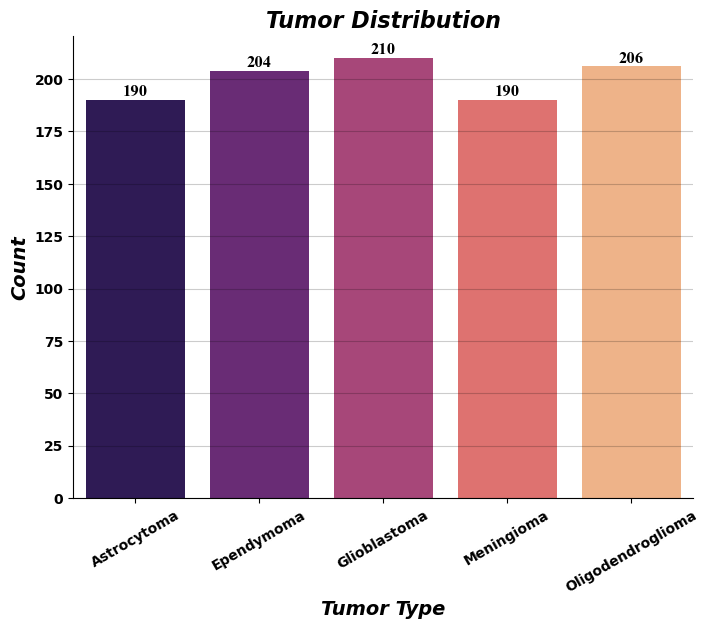

In [7]:
# Tumor type distribution graph
plt.figure(figsize=(8,6))
sns.countplot(df, x = 'Tumor Type', palette= 'magma')
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Tumor Distribution", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Tumor Type', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Count', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks(rotation  = 30, fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=12, fontweight='bold')

<h3><b>Location</b></h3>

/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/4121078822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = 'Location', palette= 'plasma')


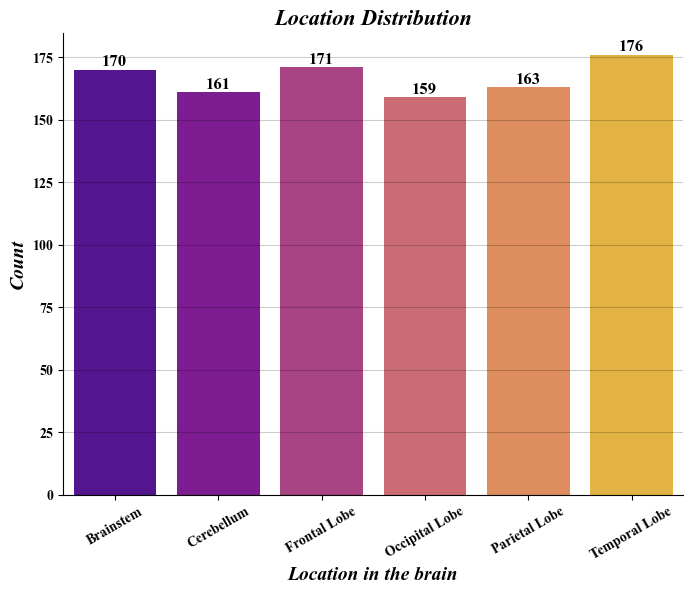

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(df, x = 'Location', palette= 'plasma')
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Location Distribution", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Location in the brain', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Count', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks(rotation  = 30, fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=12, fontweight='bold')


<h3><b>Grade</b></h3>

/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/2891860935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = 'Grade', palette= 'inferno')


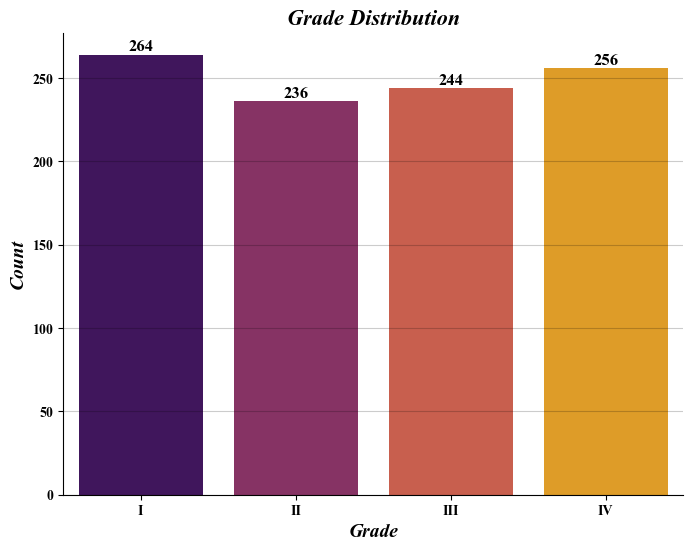

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(df, x = 'Grade', palette= 'inferno')
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Grade Distribution", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Grade', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Count', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks(fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=12, fontweight='bold')

<h3><b>Gender</b></h3>

/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/3569584500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = 'Gender', palette= 'plasma')


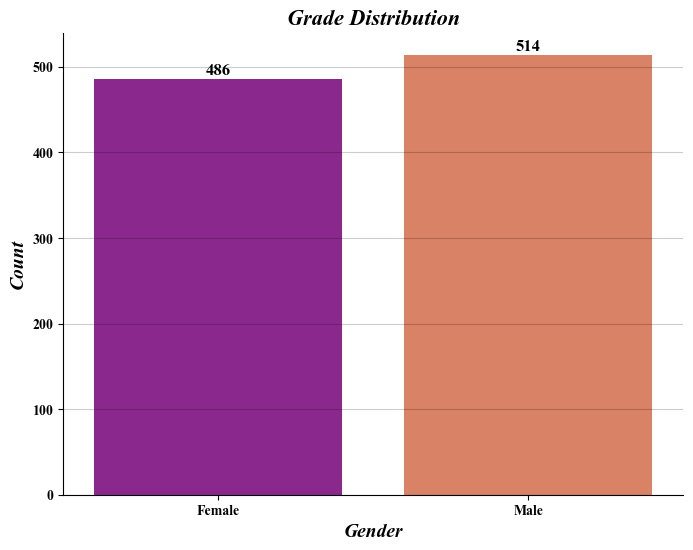

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df, x = 'Gender', palette= 'plasma')
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Grade Distribution", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Gender', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Count', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks(fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=12, fontweight='bold')

<h2><b>Quantitative Data Distribution</b></h2>

---

<h2><b>Age</b></h2>

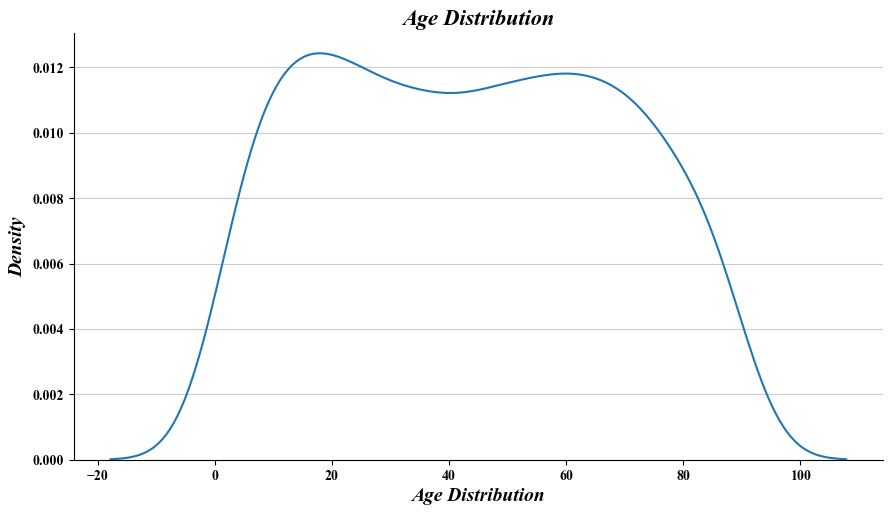

In [11]:
sns.displot(df, x = 'Patient Age', kind = 'kde', height = 5, aspect = 1.8 )
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Age Distribution", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Age Distribution', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Density', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks(fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')



<p><b>It seeems that distribution is spread out with two peaks.</b></p>

<h3><b>Size</b></h3>

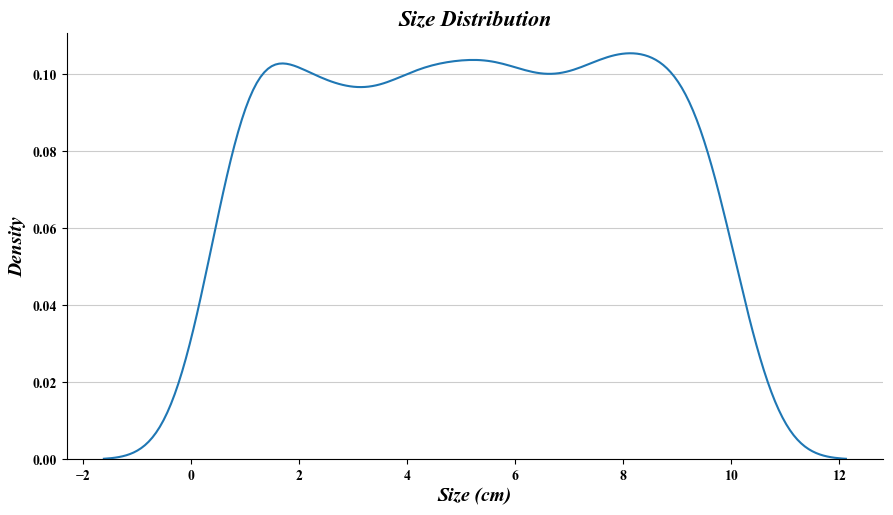

In [12]:
sns.displot(df, x = 'Size (cm)', kind = 'kde', height = 5, aspect = 1.8 )
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Size Distribution", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Size (cm)', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Density', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks(fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')


<h3><b>Correlation between Age and Size</b></h3>

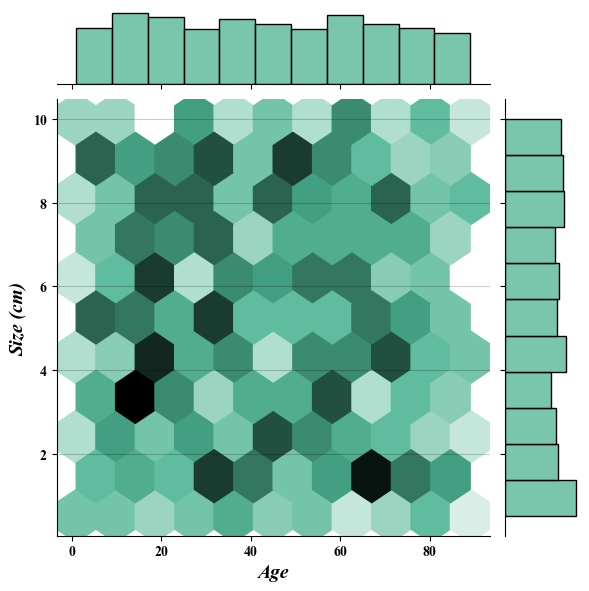

In [13]:
sns.jointplot(df, x = "Patient Age", y = "Size (cm)", kind='hex', color="#4CB391")
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Age', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Size (cm)', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks(fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')


<p><b>There is no vissible correlation observed, but lets confirm with statistical test.</b></p>

In [14]:
P_corr = pearsonr(df['Patient Age'], df['Size (cm)'])
P_corr

PearsonRResult(statistic=np.float64(-0.004660973531226072), pvalue=np.float64(0.8829667593710733))

<hp> <b>r = -0.0047, p-value = 0.882. No correlation between Tumor size and Patient Age</b></p>

<h2><b>Tumor Size distibution by Tumor Type</b></h2>

/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/3986919804.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(df.sort_values('Tumor Type'), x ='Tumor Type', y = 'Size (cm)', kind='boxen', palette='magma', height=6, aspect=1)


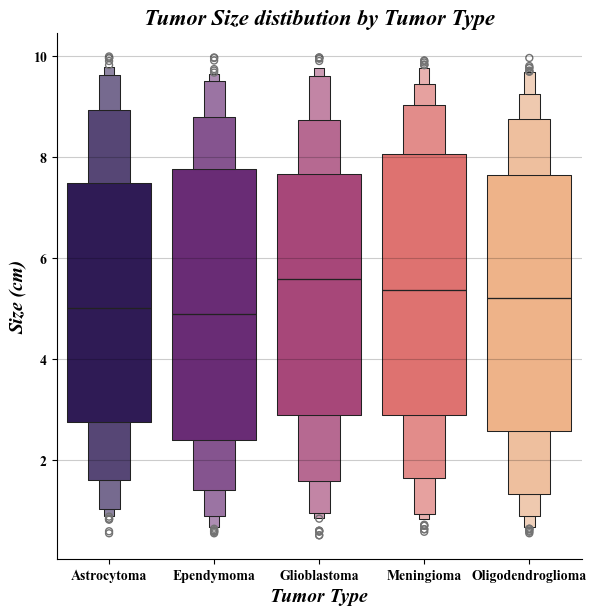

In [15]:
sns.catplot(df.sort_values('Tumor Type'), x ='Tumor Type', y = 'Size (cm)', kind='boxen', palette='magma', height=6, aspect=1)
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Tumor Size distibution by Tumor Type", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Tumor Type', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Size (cm)', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks(fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')

<p><b>There  is no visible mean difference between tumor types, but lets run one-way anova to check</b></p>

In [16]:
f_value, p_value = f_oneway(df['Size (cm)'][df['Tumor Type'] == 'Meningioma'],
        df['Size (cm)'][df['Tumor Type'] == 'Astrocytoma'],
        df['Size (cm)'][df['Tumor Type'] == 'Ependymoma'],
        df['Size (cm)'][df['Tumor Type'] == 'Glioblastoma'],
        df['Size (cm)'][df['Tumor Type'] == 'Oligodendroglioma'])

In [17]:
f_value, p_value

(np.float64(0.5072653111397442), np.float64(0.7304191188464471))

<p><b>F-value = 0.5, p-value = 0.73. There is no statistically significant difference in the mean size values between tumor types.</b></p>

<h2><b>Tumor Size distibution by Location</b></h2>

/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/1554715663.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(df.sort_values('Location'), x ='Location', y = 'Size (cm)', kind='boxen', palette='plasma', height=6, aspect=1)


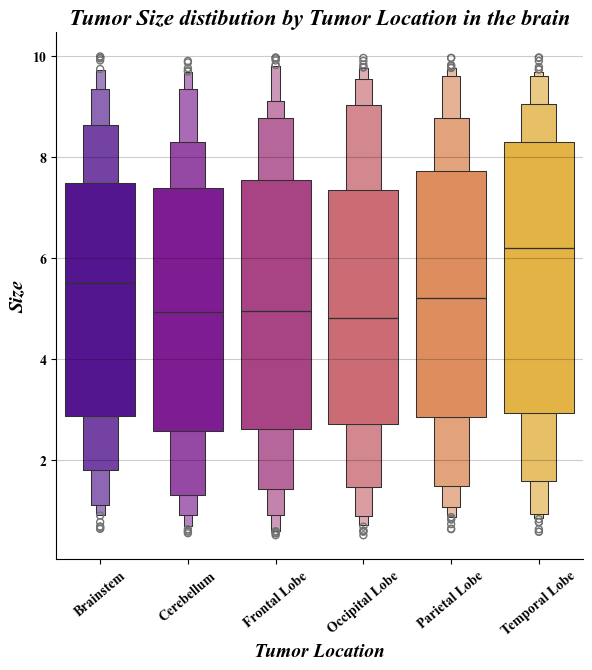

In [18]:
sns.catplot(df.sort_values('Location'), x ='Location', y = 'Size (cm)', kind='boxen', palette='plasma', height=6, aspect=1)
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Tumor Size distibution by Tumor Location in the brain", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Tumor Location', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Size', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks(rotation = 40, fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')

In [19]:
f_value, p_value = f_oneway(df['Size (cm)'][df['Location'] == 'Brainstem'],
        df['Size (cm)'][df['Location'] == 'Cerebellum'],
        df['Size (cm)'][df['Location'] == 'Frontal Lobe'],
        df['Size (cm)'][df['Location'] == 'Occipital Lobe'],
        df['Size (cm)'][df['Location'] == 'Parietal Lobe'],
        df['Size (cm)'][df['Location'] == 'Temporal Lobe'])

In [20]:
f_value, p_value

(np.float64(1.629194876126944), np.float64(0.14947963986423385))

<p><b>No statistically significant difference in tumor size mean values across tumor locations in the brain</b> </p>

<h2><b>Size by tumor grade</b></h2>

/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/133090673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(df.sort_values('Grade'), x ='Grade', y = 'Size (cm)', kind='boxen', palette='plasma', height=6, aspect=1)


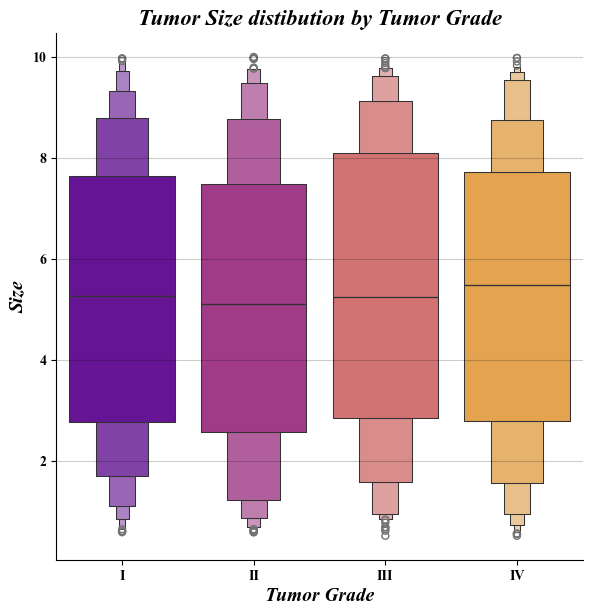

In [21]:
sns.catplot(df.sort_values('Grade'), x ='Grade', y = 'Size (cm)', kind='boxen', palette='plasma', height=6, aspect=1)
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Tumor Size distibution by Tumor Grade", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Tumor Grade', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Size', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks( fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')

In [22]:
f_value, p_value = f_oneway(df['Size (cm)'][df['Grade'] == 'I'],
        df['Size (cm)'][df['Grade'] == 'II'],
        df['Size (cm)'][df['Grade'] == 'III'],
        df['Size (cm)'][df['Grade'] == 'IV'])

In [23]:
f_value, p_value

(np.float64(0.5562110785873197), np.float64(0.6440549476267361))

<p><b>F-values: 0.56, P-value: 0.64. No significant difference between the gropus</b></p>

<h2><b>Tumor Grade distibution by Patient Age</b></h2>

/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/2289774723.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(df.sort_values('Grade'), x ='Grade', y = 'Patient Age', kind='boxen', palette='plasma', height=6, aspect=1)


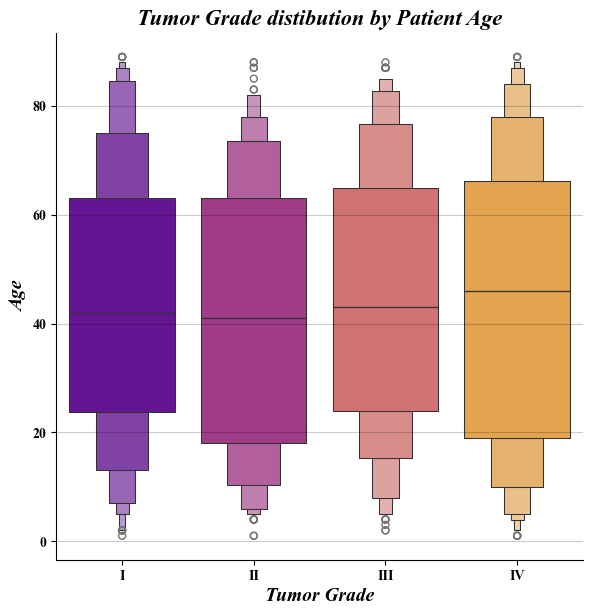

In [24]:
sns.catplot(df.sort_values('Grade'), x ='Grade', y = 'Patient Age', kind='boxen', palette='plasma', height=6, aspect=1)
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Tumor Grade distibution by Patient Age", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Tumor Grade', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Age', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks( fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')

In [25]:
f_value, p_value = f_oneway(df['Patient Age'][df['Grade'] == 'I'],
        df['Patient Age'][df['Grade'] == 'II'],
        df['Patient Age'][df['Grade'] == 'III'],
        df['Patient Age'][df['Grade'] == 'IV'])

In [26]:
f_value, p_value

(np.float64(0.8705485889380672), np.float64(0.45582017731863866))

<p><b>F-values: 0.87, P-value: 0.46. No significant difference between the gropus</b></p>

<h2><b>Tumor Size distibution by Gender</b></h2>

/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/3635850688.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(df.sort_values('Gender'), x ='Gender', y = 'Size (cm)', kind='boxen', palette='plasma', height=6, aspect=1)


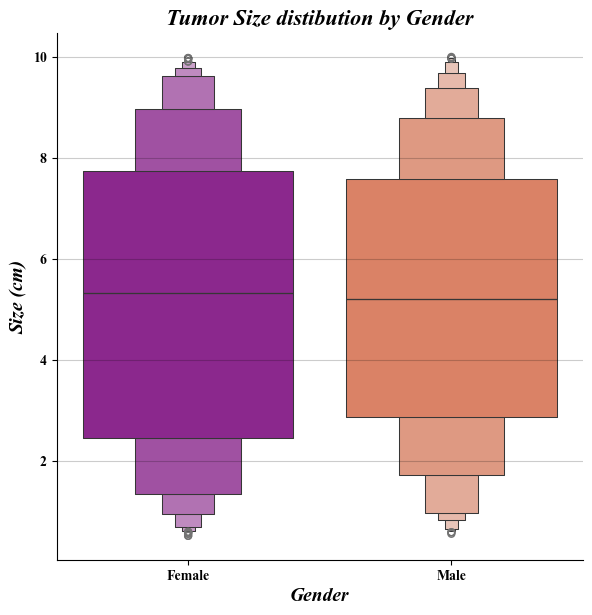

In [27]:
sns.catplot(df.sort_values('Gender'), x ='Gender', y = 'Size (cm)', kind='boxen', palette='plasma', height=6, aspect=1)
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Tumor Size distibution by Gender", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Gender', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Size (cm)', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks( fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')

<h2><b>Location distribution of each tumor type</b></h2>

In [28]:
# Count tumor at each location by tumor type 
df_loc_tumor_type = df.groupby(['Tumor Type'])['Location'].value_counts().reset_index(name='counts')
df_loc_tumor_type

/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/1332392820.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_loc_tumor_type = df.groupby(['Tumor Type'])['Location'].value_counts().reset_index(name='counts')


,Tumor Type,Location,counts
0,Astrocytoma,Frontal Lobe,38
1,Astrocytoma,Parietal Lobe,32
2,Astrocytoma,Cerebellum,31
3,Astrocytoma,Occipital Lobe,30
4,Astrocytoma,Temporal Lobe,30
5,Astrocytoma,Brainstem,29
6,Ependymoma,Frontal Lobe,38
7,Ependymoma,Temporal Lobe,36
8,Ependymoma,Brainstem,35
9,Ependymoma,Occipital Lobe,35


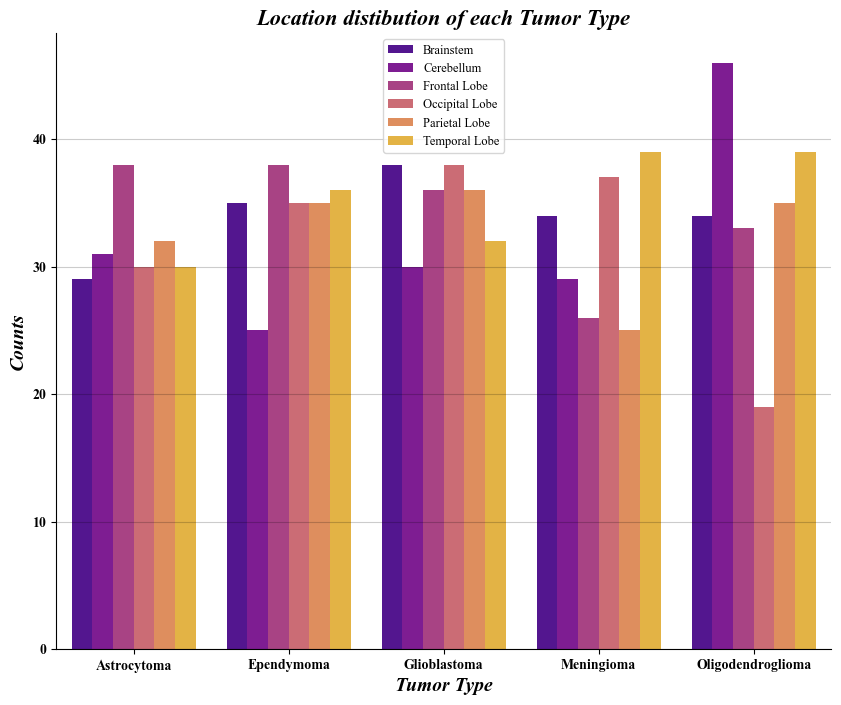

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(df_loc_tumor_type, x ='Tumor Type', y='counts', hue='Location', palette='plasma')
sns.despine()
plt.rcParams['font.family'] = 'Times New Roman'
plt.title("Location distibution of each Tumor Type", fontsize = 16, fontweight ='bold', fontstyle= 'italic')
plt.xlabel('Tumor Type', fontweight = 'bold', fontsize = 14,fontstyle= 'italic')
plt.ylabel('Counts', fontweight = 'bold', fontsize = 14, fontstyle= 'italic')
plt.xticks( fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.legend(fontsize = 9, loc = 'upper center')
plt.grid(axis= 'y', alpha = 0.2, color = 'black')


<h4><b>Chi-Square test of independence to check independence between location and tumor type</b></h4>

In [30]:
# Constract contigency table
contingency_table = pd.pivot_table(df_loc_tumor_type, values='counts', index='Tumor Type', columns='Location', aggfunc='sum', fill_value=0 )


/var/folders/6q/6s3nyydn0vjdgjhhzgdmbxhw0000gn/T/ipykernel_95429/3759038477.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  contingency_table = pd.pivot_table(df_loc_tumor_type, values='counts', index='Tumor Type', columns='Location', aggfunc='sum', fill_value=0 )


In [31]:
# Run the test
statistics, p, dof, expected = stats.chi2_contingency(contingency_table)
statistics, p, dof

(np.float64(22.337542743035538), np.float64(0.3224790810575033), 20)

<h4><b>Statistics: 22.34, P-value: 0.32, df = 20. The variables are independent, reject alternative hypothesis</b></h4>

---

<h3><b>Conclusion</b></h3>

<h4><i><b>The analysis did not reveal any statistically relationship between the variables.</h4></i></b>